<h2>Pre-Process Data</h2>
<center><h2> Import Libraries and Setups </h2></center></p>

In [25]:
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from collections import defaultdict
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
%matplotlib inline

<center><h2>Reading the dataset </h2></center></p>

In [2]:
data = pd.read_csv('C:/Users/Chetan Awachat/Downloads/weatherAUS.csv')

In [3]:
data.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

<h2>Handling the Categorical Data</h2>

In [5]:
replace_wind = {"WindGustDir" : {"N":1,"S":2,"E":3,"W":4,"NE":5,"NW":6,"SE":7,"SW":8,"NNW":9,"NNE":10,"SSW":11,"SSE":12,"ESE":13,"ENE":14,"WSW":15,"WNW":16}
               , "WindDir9am" : {"N":1,"S":2,"E":3,"W":4,"NE":5,"NW":6,"SE":7,"SW":8,"NNW":9,"NNE":10,"SSW":11,"SSE":12,"ESE":13,"ENE":14,"WSW":15,"WNW":16}
               , "WindDir3pm" : {"N":1,"S":2,"E":3,"W":4,"NE":5,"NW":6,"SE":7,"SW":8,"NNW":9,"NNE":10,"SSW":11,"SSE":12,"ESE":13,"ENE":14,"WSW":15,"WNW":16}}
data.replace(replace_wind, inplace=True)

In [6]:
data['RainToday'] = pd.get_dummies(data['RainToday'],drop_first=True)
data['RainTomorrow'] = pd.get_dummies(data['RainTomorrow'],drop_first=True)

<h2>Fiiling the missing values</h2>

In [7]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
data.MinTemp = data.groupby('Location')['MinTemp'].apply(lambda x: x.fillna(x.median()))
data.MinTemp = data.MinTemp.fillna(data.MinTemp.median())

data.MaxTemp = data.groupby('Location')['MaxTemp'].apply(lambda x: x.fillna(x.median()))
data.MaxTemp = data.MaxTemp.fillna(data.MaxTemp.median())

In [9]:
df = data.drop(['Evaporation','Sunshine','Cloud3pm','Cloud9am','Date','Location'],axis = 1)

In [10]:
df = df.fillna(round(df.mean()))

In [11]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

<h2>Data Exploration<h2>

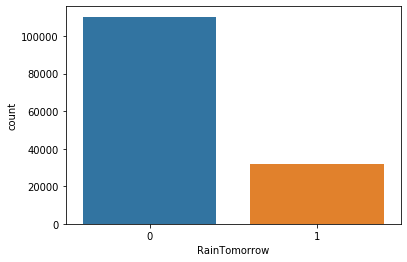

In [12]:
sns.countplot(x=df['RainTomorrow'])

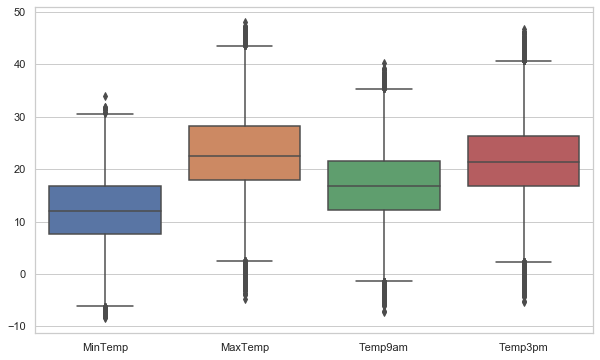

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

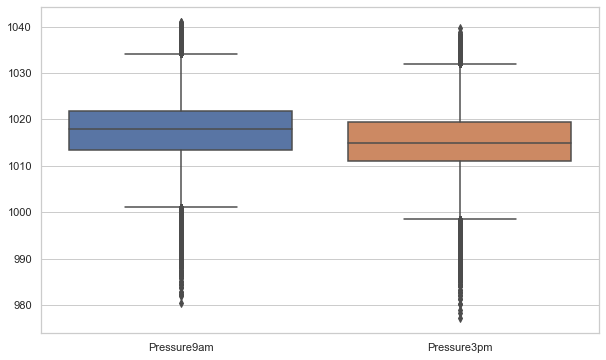

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Pressure9am','Pressure3pm']])

In [15]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,4.0,44.0,4.0,16.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0,0
1,7.4,25.1,0.0,16.0,44.0,9.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0,0
2,12.9,25.7,0.0,15.0,46.0,4.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0,0
3,9.2,28.0,0.0,5.0,24.0,7.0,3.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.0,0
4,17.5,32.3,1.0,4.0,41.0,14.0,6.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.2,0


# Splitting the data in train and test

In [16]:
from sklearn.model_selection import train_test_split   
X = df.drop(['RainTomorrow'],axis = 1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Using Standard scaler for Feature Scaling

In [17]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

## Hard And Soft Voting

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
log_clf = LogisticRegression(C=100, penalty='l2', solver='liblinear')
knn_clf = KNeighborsClassifier(7)
svm_clf = SVC(kernel='rbf', gamma=0.01,C = 10, probability = True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9998874792539875
KNeighborsClassifier 0.8841598919800838
SVC 0.9968775492981519
VotingClassifier 0.9971307209766801


In [21]:
log_clf = LogisticRegression(C=100, penalty='l2', solver='liblinear')
knn_clf = KNeighborsClassifier(7)
svm_clf = SVC(kernel='rbf', gamma=0.01, C = 10, probability = True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9998874792539875
KNeighborsClassifier 0.8841598919800838
SVC 0.9968775492981519
VotingClassifier 0.9995780472024529


## Bagging

__Bagging on decision tree__

In [26]:
dtree_Bag = DecisionTreeClassifier()
bag_clf = BaggingClassifier(dtree_Bag, n_estimators=1000, max_samples=200, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
F1_score_tree_Bag=f1_score(y_test,bag_clf.predict(X_test), average='weighted')
print("Bagging Decision Tree Classifier F1-score {:.4f}".format(F1_score_tree_Bag))

Bagging Decision Tree Classifier F1-score 0.9999


[[27391   152]
 [ 2584  5422]]


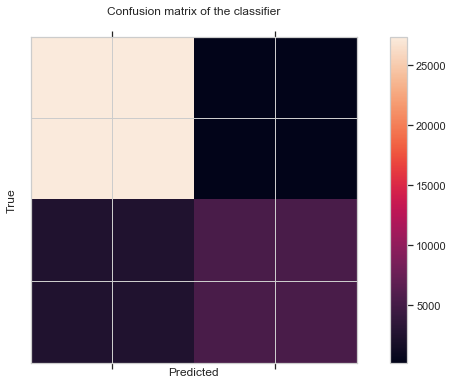

In [60]:
cm = confusion_matrix(y_test, bag_clf.predict(X_test))
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] )
ax.set_yticklabels([''] )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Bagging on Logistic Regression__

In [27]:
Log_Bag = LogisticRegression(solver='lbfgs')
bag_clf = BaggingClassifier(Log_Bag, n_estimators=1000, max_samples=200, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
F1_score_log_bag=f1_score(y_test,bag_clf.predict(X_test), average='weighted')
print("Bagging on Logistic regression F1-score {:.4f}".format(F1_score_log_bag))

Bagging on Logistic regression F1-score 0.9178


# Pasting

__Pasting on SVM__

In [30]:
pasting_svm = BaggingClassifier(svm_clf, n_estimators=1000, max_samples=200, bootstrap=False, random_state=0, oob_score=False)

pasting_svm.fit(X_train, y_train)
F1_score_svm_pasting=f1_score(y_test,pasting_svm.predict(X_test), average='weighted')
print("Pasting on Support vector machine F1-score {:.4f}".format(F1_score_svm_pasting))

Pasting on Support vector machine F1-score 0.9244


__Pasting on Logistic Regression__

In [31]:
Log_Bag = LogisticRegression(solver='lbfgs')
pasting_log = BaggingClassifier(Log_Bag, n_estimators=1000, max_samples=200, bootstrap=False, random_state=0, oob_score=False)

pasting_log.fit(X_train, y_train)
F1_score_log_pasting=f1_score(y_test,pasting_log.predict(X_test), average='weighted')
print("Pasting on Logistic regression F1-score {:.4f}".format(F1_score_log_pasting))

Pasting on Logistic regression F1-score 0.9178


# Boosting

__Adaboost on Decision Tree__

In [32]:
ada_decision = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_decision.fit(X_train, y_train)
F1_score_ada_tree=f1_score(y_test,ada_decision.predict(X_test), average='weighted')
print("Adaboost on DecisionTree classifier F1-score {:.4f}".format(F1_score_ada_tree))

Adaboost on DecisionTree classifier F1-score 1.0000


__Adaboost on Logistic Regression__

In [33]:
ada_Logistic = AdaBoostClassifier(LogisticRegression(solver='lbfgs'), n_estimators=200, algorithm="SAMME.R", learning_rate=0.3, random_state=0)
ada_Logistic.fit(X_train, y_train)
F1_score_ada_log=f1_score(y_test,ada_Logistic.predict(X_test), average='weighted')
print("Adaboost on Logistic regression F1-score {:.4f}".format(F1_score_ada_log))

Adaboost on Logistic regression F1-score 0.9302


__Gradient Boosting__

In [34]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1,max_depth=1)
gbrt.fit(X_train, y_train)
F1_score_gbrt=f1_score(y_test,gbrt.predict(X_test), average='weighted')
print("Gradient boosting F1-score {:.4f}".format(F1_score_gbrt))

Gradient boosting F1-score 1.0000


# Dimension Reduction 

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test=pca.transform(X_test)

In [36]:
pca.n_components_

11

In [62]:
pca.explained_variance_ratio_

array([0.27375501, 0.16845102, 0.11074249, 0.07065783, 0.06504407,
       0.05533839, 0.05158019, 0.05089258, 0.04717496, 0.03071885,
       0.02680838])

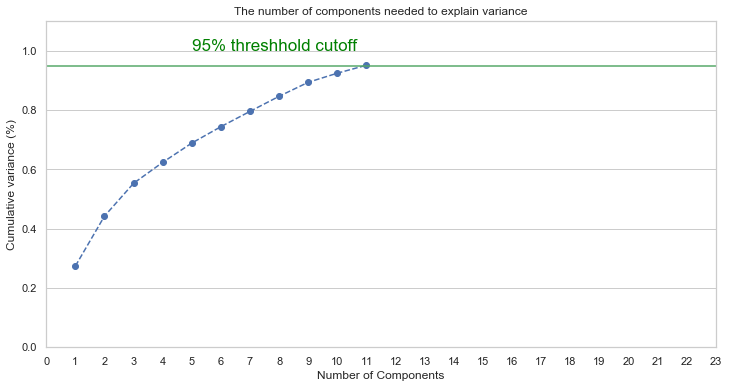

In [63]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 24, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='g', linestyle='-')

plt.text(5, 1.0, '95% threshhold cutoff', color = 'green', fontsize=17)


ax.grid(axis='x')
plt.show()

# Running all the models on Reduced Dataset

__Logistic Regression__

In [38]:
pca_Log_L1=LogisticRegression(C=100, penalty='l2', solver='liblinear')
pca_Log_L1.fit(X_reduced_train,y_train)
pca_Log_L1.score(X_reduced_test,y_test)
pca_F1_score_log_L1=f1_score(y_test,pca_Log_L1.predict(X_reduced_test), average='weighted')
print("F1 score for Logistic when c=0.1 and Penalty=L1  {:.4f}".format(pca_F1_score_log_L1))

F1 score for Logistic when c=0.1 and Penalty=L1  0.9640


__Knn__

In [41]:
knn_clf.fit(X_reduced_train, y_train)
knn_clf.score(X_reduced_test, y_test)
pca_F1_score_knn=f1_score(y_test,knn_clf.predict(X_reduced_test), average='weighted')
print("Knn Classifier F1-score {:.4f}".format(pca_F1_score_knn))

Knn Classifier F1-score 0.8770


__SVM Classifier__

In [42]:
svm_clf.fit(X_reduced_train,y_train)
pca_F1_score_svc=f1_score(y_test,svm_clf.predict(X_reduced_test), average='weighted')
print("SVM Classifier F1-score {:.4f}".format(pca_F1_score_svc))

SVM Classifier F1-score 0.9675


__Linear SVC__

In [43]:
clf = LinearSVC()
clf.fit(X_reduced_train,y_train)
pca_F1_score_svc_liner=f1_score(y_test,clf.predict(X_reduced_test), average='weighted')
print('Linear SVC F1 score',pca_F1_score_svc_liner)

Linear SVC F1 score 0.9637478992852676


__Decision Tree__

In [44]:
dtree_reduced = DecisionTreeClassifier(random_state=0,max_depth=5,criterion='entropy')
dtree_reduced.fit(X_reduced_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree_reduced.score(X_reduced_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree_reduced.score(X_reduced_test, y_test)))
pca_F1_score_tree=f1_score(y_test,dtree_reduced.predict(X_reduced_test), average='weighted')
print("Decision Tree Classifier F1-score {:.4f}".format(pca_F1_score_tree))

Accuracy on training set: 0.877
Accuracy on test set: 0.876
Decision Tree Classifier F1-score 0.8681


In [67]:
pca_f1=[pca_F1_score_knn,pca_F1_score_log_L1,pca_F1_score_svc,pca_F1_score_svc_liner,pca_F1_score_tree]
model=['knn alorithm','Logistic Rgression','SVM','Linear SVC','Decision Tree']
pca_df_res= pd.DataFrame({'Model_PCA':model, 'F1-SCORE':pca_f1})
round(pca_df_res,2)

,Model_PCA,F1-SCORE
0,knn alorithm,0.88
1,Logistic Rgression,0.96
2,SVM,0.97
3,Linear SVC,0.96
4,Decision Tree,0.87


In [64]:
old_results=pd.read_csv('Project1_Output.csv')

In [65]:
old_results

,Model,F1-Score
0,Logistic Regression,1.00
1,Linear SVC,0.99
2,SVM,0.98
3,Decision Tree,1.00
4,knn algorithm,0.88


__Comparing the two tables we can observe that, PCA with F1 score evaluation did not performe well. PCA serves its purpose of reducing the whole dataset dimension to 11 dimension without losing much of the information of the data__

# Deep Learning  Method

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def NN_model(): # function to be passed onto the KerasClassifier
    #create perceptron model
    model = Sequential()
    model.add(Dense(48, input_dim=26, activation='relu')) # Input layer
    model.add(Dense(24, activation='relu')) #Hidden layer
    model.add(Dense(1, activation='sigmoid')) # Output layer
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
np.random.seed(6) #reproducability

#Defining the keras classifier model
model = KerasClassifier(build_fn = NN_model, verbose = 0)

param_grid = {'batch_size':[25,50,75] , 'epochs':[50, 100, 150]}
grid_search = GridSearchCV(estimator= model, n_jobs=-1,param_grid = param_grid,scoring='f1',cv = 2)

grid_search_result = grid_search.fit(X_train, y_train)

In [ ]:
grid_search_result.best_params_

In [ ]:
ker=KerasClassifier(build_fn=NN_model,verbose=0,epochs=,batch_size=)
ker.fit(X_train,y_train)
scr=ker.predict(X_test)
print('Test F1 score obtained from the NN Classifier: {:.4f}'.format(f1_score(y_test,scr)))

## Ran the Neural code on Virtual Environment using CMD because Tensorflow was not compatible, have attached the ss of output

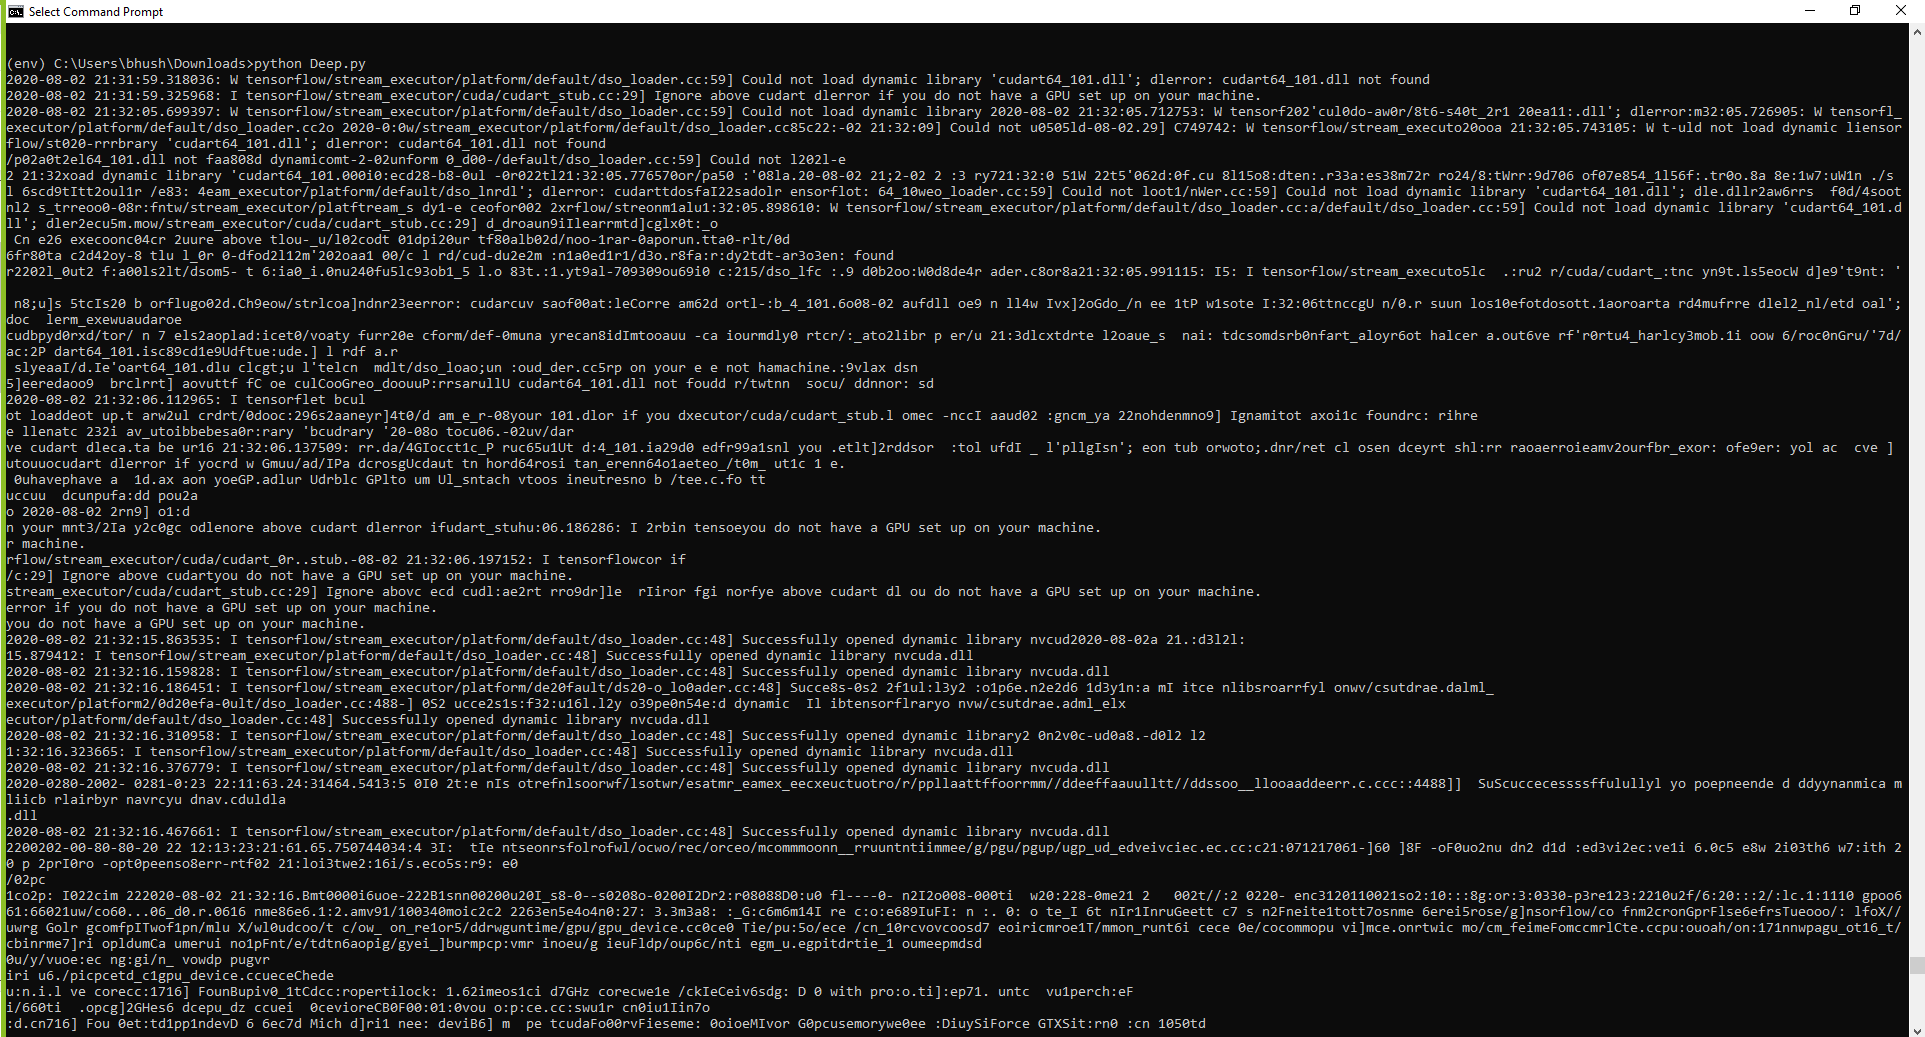

In [2]:
# Running the Neural Network stored in Deep.py
from IPython.display import Image
Image(filename='NNC.png')

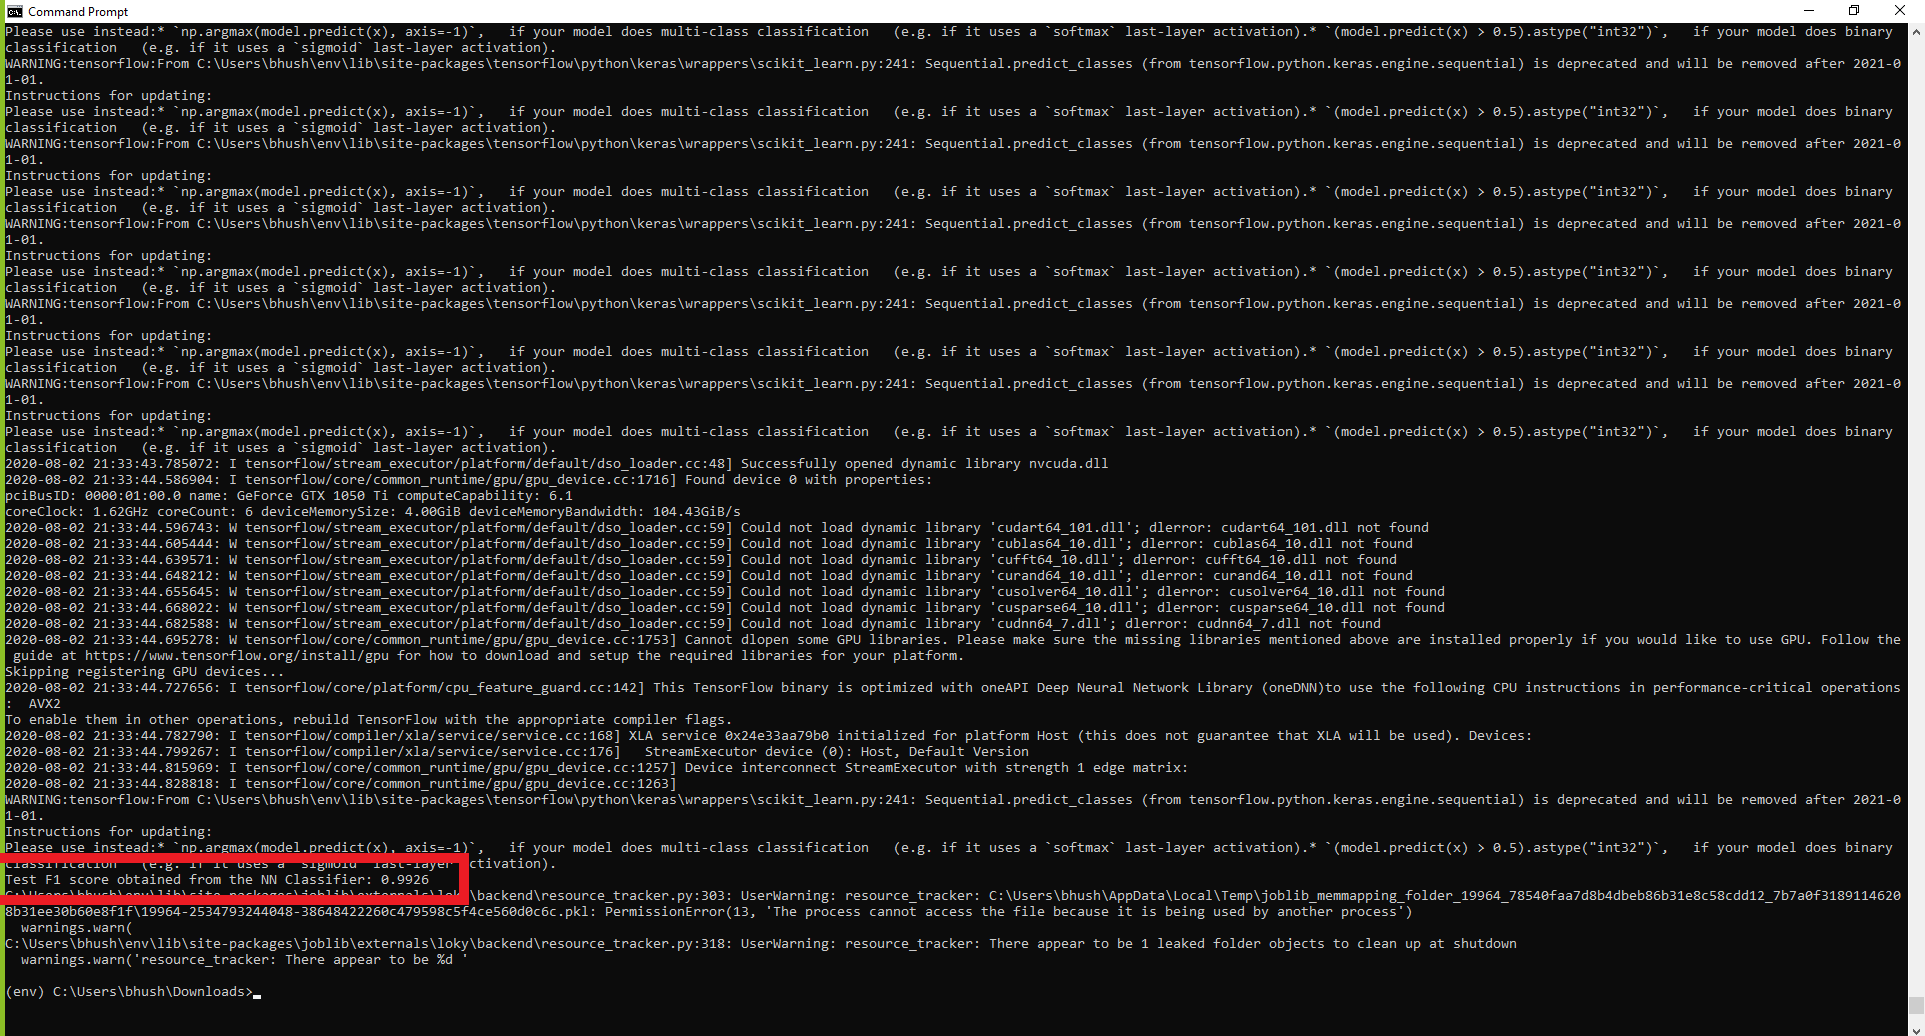

In [4]:
# Output of the code Deep.py
from IPython.display import Image
Image(filename='NNF.png')

# Test F1 score obtained from the NN_model Classifier: 0.9926